# Longer term analysis 

### workflow:
1. infill missing data in daily moth time series (average over days of missed collection)
1. select all moth species, or by functional group or individual species
1. calculate monthly sums of moth counts
1. Use daily meterology time series (for the sake of comparing data at two frequencies)

### loading and pre-processing moth or butterfly data
Notes:
- In the ECN data, 'XX' will be marked if no moths are obsersved on a sammpling day.

In [1]:
# load packages and scripts

#source("cpt/source.R")
source("R/helper.R")

options(repr.plot.width = 18, repr.plot.height = 10)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Parsed with column specification:
cols(
  IM_SPEC = col_double(),
  DESC_LATIN = col_character(),
  DESC_COMMON = col_character(),
  IM_GROUP = col_character()
)

Parsed with column specification:
cols(
  IM_SPEC = col_character(),
  DESC_LATIN = col_character(),
  DESC_COMMON = col_character(),
  IM_GROUP = col_character()
)



### examples to extract moth data
1. all moth spcies
1. functional groups
1. one of the interesting soecies
1. custom query from moth trait table

In [7]:
# all moth species
moth1 = inputData(
    list(dataset='moth', # moth or butterfly
         site = 'T08', # ECN site code
         daterange= c("1950-01-01","2021-01-01"),
         avg_missing_data = TRUE, # average over missed sampling days?
         plotPredOpt = NA  # query moth
        ))
# one of the functional groups ('G','M','N','O')
moth2 = inputData(
    list(dataset='moth', # moth or butterfly
         site = 'T08', # ECN site code
         daterange= c("1950-01-01","2021-01-01"),
         avg_missing_data = TRUE, # average over missed sampling days?
         plotPredOpt = 'G'  # query moth
        ))
# one of the interesting species
moth3 = inputData(
    list(dataset='moth', # moth or butterfly
         site = 'T08', # ECN site code
         daterange= c("1950-01-01","2021-01-01"),
         avg_missing_data = TRUE, # average over missed sampling days?
         plotPredOpt = 'Barred Straw'  # query moth
        ))
# custom query on moth traits
moth4 = inputData(
    list(dataset='moth', # moth or butterfly
         site = 'T08', # ECN site code
         daterange= c("1950-01-01","2021-01-01"),
         avg_missing_data = TRUE, # average over missed sampling days?
         plotPredOpt = "WINGSPAN > 40 & Genus=='Agrotis'"  # query moth
        ))

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'year(DATETIME)' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'year(DATETIME)' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'year(DATETIME)' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'year(DATETIME)' (override with `.groups` argument)



In [3]:
list_interesting_moth %>% distinct(DESC_COMMON)

DESC_COMMON
<chr>
Barred Straw
Brimstone Moth
Common Footman
Common Pug
Dark Arches
December Moth
Diamond backed moth
Flounced Rustic
Garden Tiger


### Moth traits info

In [4]:
library(readxl)
read_excel('/data/ecn/MOTH_TRAIT_CODES_MASTER_4_Peter.xlsx') 
moth_traits = read_excel('/data/ecn/MOTH_TRAIT_CODES_MASTER_4_Peter.xlsx', sheet='MOTH_TRAIT_CODES_MASTER') 
head(moth_traits %>% mutate(IM_CODE = substr(IM_CODE,4,nchar(IM_CODE))))

Trait code,Trait,Categories,Sources
<chr>,<chr>,<chr>,<lgl>
UK_DIST,UK latitudinal distribution,"1 = southerly - up to third 100km latitudinal band, roughly up to the Wash, 2 = up to fifth latitudinal band, roughly up to Cumbria, N. Yorkshire etc, 3 = up to sixth latitudinal band, roughly up to Northumberland and southern lowlands of Scotland, 4 = tenth latitudinal band or higher, virtually or totally throughout whole of UK",NA
LARVAL_PLANT,Number and type of main larval food plants,"1 = decidious trees, including low decidious in hedgerows (Hawthorn etc), 2 = coniferous trees and shrubs, 3 = grasses, including sedges and rushes, 4 = dicots, including herbaceous and low woody shrubs such as heather etc. 5 = lichens, mosses, fungi and algae (majority are lichens), 6 = polyphagous - covering at least two of the above categories",NA
FEED_SPEC,Broad categories of larval feeding specialisation,"1 = monophagous (one species only or rarely other species, 2 = specialised (restricted to one family of food plant or lower taxa of plants apart from food resources rarely taken, 3 = intermediate, fairly generalist within groups 1 - 5 above 4 = polyphagous - spanning at least two of groups 1 - 5 above",NA
HAB,Broad habitat preferences,"1 = woodland, 2 = farmland (inc. pasture), 3 = coastal, 4 = wetland (fens, marshes and bogs), 5 = unimproved grassland (inc. downland), 6 = heathland, 7 = upland, 8 = gardens, allottments, scrubland and brown field, 9 = highly eurytopic",NA
WINGSPAN,Wing span in mm (as surrogate for dispersal power),mean width of the span of the forewings,NA
SPAN_GRP,Wing span in mm (as surrogate for dispersal power) -seperated into five categories,"as above but simplified to five categories of wing-span, 1 = up to 20mm, 2 = 21-30mm, 3 = 31-40mm, 4 = 41-50mm, 5 = 51mm or above",NA
OVERWINTER,Overwintering stage,"1 = egg, 2 = larva, 3 = pupa, 4 = adult",NA
VOLT,Voltinism,"1 = always univoltine, 2 = variable between single generation and two (rarely three) (which virtually always differ between geographic areas with multipe generations in the south and single further north, 3 = obligate multivoltine across UK or range of the moth, with two generaions per year, 4 = obligate multivoltine, with three generations per year across UK or range of the moth",NA
FLY_TIME,Flight period,"1 = spring only (March to May), 2 = summer only (June to August), 3 = spring and summer (March to August), 4 = autumn only (September to November), 5 = summer and autumn (June to November), 6 = spring, summer and autumn (March to November), 7 = autumn, winter and spring (September to May) and (rarely) all year round",NA


IM_CODE,Genus,species,COMMON NAME,Family,UK_DIST,LARVAL_PLANT,FEED_SPEC,HAB1,HAB2,⋯,HAB9,WINGSPAN,SPAN_GRP,OVERWINTER,VOLT,FLY_TIME,LARVA_TIME1,LARVA_TIME2,LARVA_TIME3,LARVA_TIME4
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
473,Phlogophora,meticulosa,Angle Shades,Noctuidae,4,6,4,1,1,⋯,1,46,4,2,3,7,1,1,1,1
378,Cerapteryx,graminis,Antler Moth,Noctuidae,4,3,3,0,0,⋯,0,29,2,1,1,2,1,1,0,0
278,Agrotis,vestigialis,Archer's Dart,Noctuidae,3,4,3,0,0,⋯,0,30,2,2,1,5,1,1,1,1
911,Ennomos,quercinaria,August Thorn,Geometridae,2,1,3,1,0,⋯,0,40,3,1,1,5,0,1,1,0
775,Chloroclysta,miata,Autumn Green Carpet,Geometridae,4,1,3,1,1,⋯,0,31,3,4,1,6,0,1,1,0
824,Epirrita,autumnata,Autumnal Moth,Geometridae,4,1,3,1,0,⋯,0,36,3,1,1,4,0,1,0,0


In [4]:
moth = inputData(
    list(dataset='moth',
         site = 'T08', 
         daterange= c("1950-01-01","2021-01-01"),
         avg_missing_data = TRUE,
         plotPredOpt = NA  # either groups (G,M,N,O) or species (`list_interesting_moth %>% distinct(DESC_COMMON)`)
        )) %>%
    dplyr::arrange(DATETIME)

head(moth)

xmin <- min(moth$DATETIME)
xmax <- max(moth$DATETIME)

# dates are stamped first of the month
print( c("all dates stamed first of month:",
         all( lapply(strsplit(as.character(moth$DATETIME), "-"), function(x){ return(x[3])} ) == '01' ))
)

# all dates in range
alldates <- seq.Date(xmin, xmax, by='month')

# are all dates present
print( c("all dates in range:",
         all( alldates %in% moth$DATETIME ))
)

# add missing dates as zero's
moth_full <- data.frame(DATETIME = alldates) %>%
    dplyr::left_join(moth) %>%
    tidyr::replace_na(list(counts=0)) %>%
    dplyr::arrange(DATETIME)

diff(moth_full$DATETIME)
head( moth_full )

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'year(DATETIME)' (override with `.groups` argument)



DATETIME,counts
<date>,<dbl>
1992-10-01,2
1992-11-01,11
1992-12-01,0
1993-01-01,0
1993-02-01,3
1993-03-01,21


[1] "all dates stamed first of month:" "TRUE"                            
[1] "all dates in range:" "FALSE"              


Joining, by = "DATETIME"



Time differences in days
  [1] 31 30 31 31 28 31 30 31 30 31 31 30 31 30 31 31 28 31 30 31 30 31 31 30 31
 [26] 30 31 31 28 31 30 31 30 31 31 30 31 30 31 31 29 31 30 31 30 31 31 30 31 30
 [51] 31 31 28 31 30 31 30 31 31 30 31 30 31 31 28 31 30 31 30 31 31 30 31 30 31
 [76] 31 28 31 30 31 30 31 31 30 31 30 31 31 29 31 30 31 30 31 31 30 31 30 31 31
[101] 28 31 30 31 30 31 31 30 31 30 31 31 28 31 30 31 30 31 31 30 31 30 31 31 28
[126] 31 30 31 30 31 31 30 31 30 31 31 29 31 30 31 30 31 31 30 31 30 31 31 28 31
[151] 30 31 30 31 31 30 31 30 31 31 28 31 30 31 30 31 31 30 31 30 31 31 28 31 30
[176] 31 30 31 31 30 31 30 31 31 29 31 30 31 30 31 31 30 31 30 31 31 28 31 30 31
[201] 30 31 31 30 31 30 31 31 28 31 30 31 30 31 31 30 31 30 31 31 28 31 30 31 30
[226] 31 31 30 31 30 31 31 29 31 30 31 30 31 31 30 31 30 31 31 28 31 30 31 30 31
[251] 31 30 31 30 31 31 28 31 30 31 30 31 31 30 31 30 31 31 28 31 30 31 30 31 31
[276] 30 31 30

,DATETIME,counts
,<date>,<dbl>
1,1992-10-01,2
2,1992-11-01,11
3,1992-12-01,0
4,1993-01-01,0
5,1993-02-01,3
6,1993-03-01,21


In [3]:
# add column with 12 month difference
moth_full <- moth_full %>% mutate(diff12 = c(rep(NA,12), diff(counts,12)))

# calculate monthly medians and standardise
df_monthavg <- moth_full %>% 
    dplyr::mutate(month=lubridate::month(DATETIME)) %>% 
    dplyr::group_by(month) %>% 
    dplyr::summarize(monthavg=median(counts))%>% 
    dplyr::mutate(monthavgstd=monthavg - mean(monthavg))

df_monthavg

# deseasonalise with monthly standardised medians
moth_full <- moth_full %>% 
    dplyr::mutate(month=lubridate::month(DATETIME)) %>% 
    dplyr::left_join(df_monthavg) %>% 
    dplyr::mutate(deseason = counts-monthavgstd)

# calculate annual trend and detrend counts
moth_full <- moth_full %>% 
    mutate(
        ma = stats::filter(counts, 
                           filter=rep(1/12,12), 
                           method='convolution', 
                           sides=1)) %>%
    mutate(dema = counts-ma)
head( moth_full, 12 )

`summarise()` ungrouping output (override with `.groups` argument)



month,monthavg,monthavgstd
<dbl>,<dbl>,<dbl>
1,0.0,-81.79167
2,3.0,-78.79167
3,19.0,-62.79167
4,17.0,-64.79167
5,50.0,-31.79167
6,185.0,103.20833
7,328.0,246.20833
8,177.0,95.20833
9,142.0,60.20833


Joining, by = "month"



,DATETIME,counts,diff12,month,monthavg,monthavgstd,deseason,ma,dema
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1992-10-01,2,NA,10,51.0,-30.79167,32.79167,NA,NA
2,1992-11-01,11,NA,11,7.0,-74.79167,85.79167,NA,NA
3,1992-12-01,0,NA,12,2.5,-79.29167,79.29167,NA,NA
4,1993-01-01,0,NA,1,0.0,-81.79167,81.79167,NA,NA
5,1993-02-01,3,NA,2,3.0,-78.79167,81.79167,NA,NA
6,1993-03-01,21,NA,3,19.0,-62.79167,83.79167,NA,NA
7,1993-04-01,27,NA,4,17.0,-64.79167,91.79167,NA,NA
8,1993-05-01,30,NA,5,50.0,-31.79167,61.79167,NA,NA
9,1993-06-01,169,NA,6,185.0,103.20833,65.79167,NA,NA


Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 12 row(s) containing missing values (geom_path).”
Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.

Warning message:
“Removed 11 rows containing missing values (geom_point).”
Warning message:
“Removed 11 row(s) containing missing values (geom_path).”
Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.

Warning message:
“Removed 11 rows containing missing values (geom_point).”
Warning message:
“Removed 11 row(s) containing missing values (geom_path).”


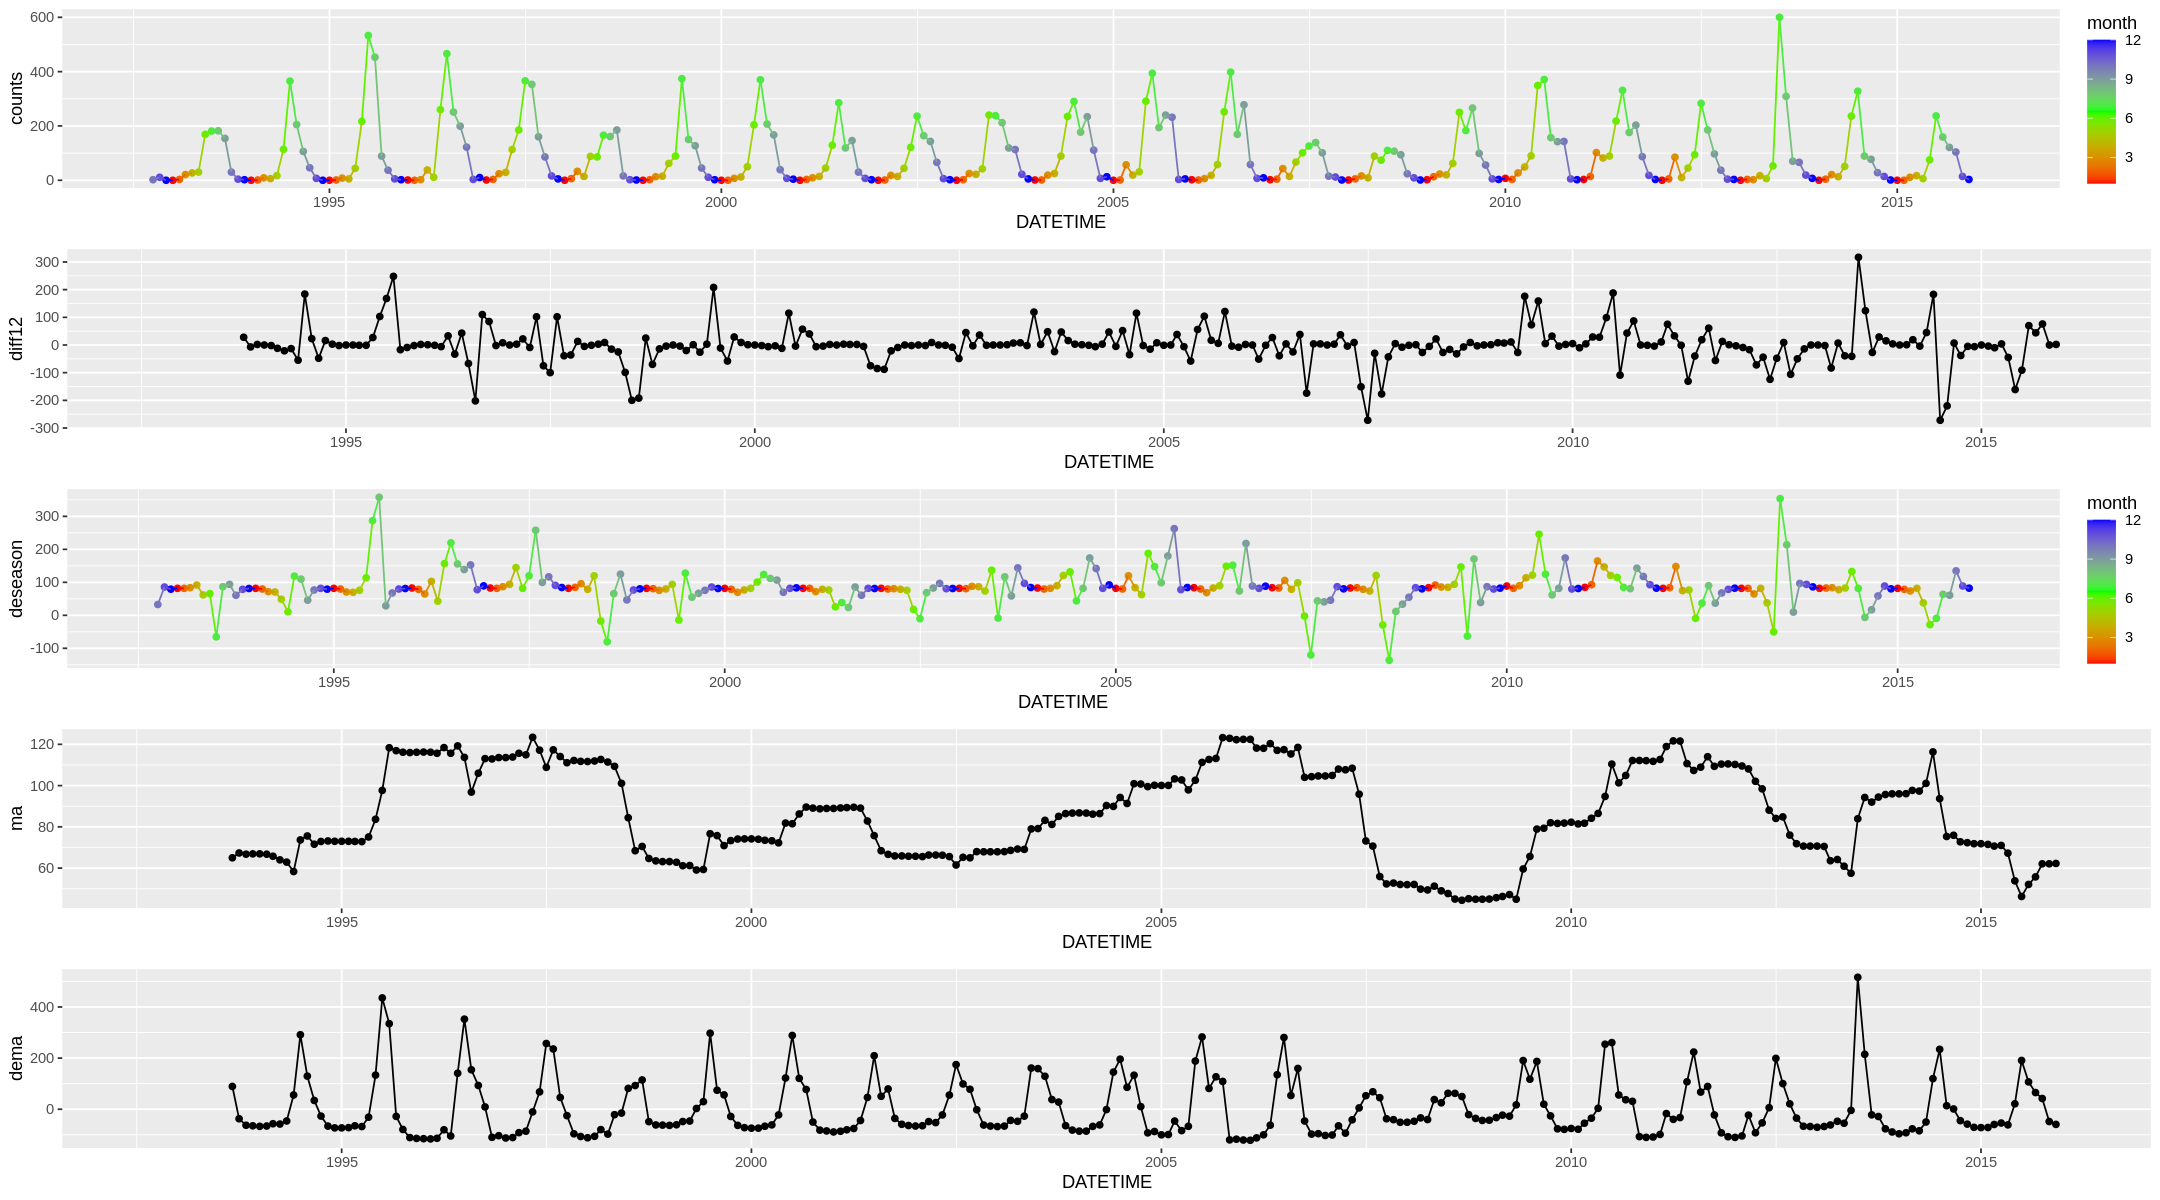

In [4]:
plot_moth <- ggplot2::ggplot(moth_full, aes(x = DATETIME, y = counts, color = month) ) +
    geom_point() +
    geom_line() +
    xlim(xmin,xmax) +
    scale_color_gradientn(colours = rainbow(3))

plot_moth_diff12 <- ggplot2::ggplot(moth_full, aes(x = DATETIME, y = diff12) ) +
    geom_point() +
    geom_line()+
    xlim(xmin,xmax)

plot_moth_deseason <- ggplot2::ggplot(moth_full, aes(x = DATETIME, y = deseason, color = month) ) +
    geom_point() +
    geom_line() +
    xlim(xmin,xmax) +
    scale_color_gradientn(colours = rainbow(3))

plot_moth_ma <- ggplot2::ggplot(moth_full, aes(x = DATETIME, y = ma) ) +
    geom_point() +
    geom_line()+
    xlim(xmin,xmax)

plot_moth_dema <- ggplot2::ggplot(moth_full, aes(x = DATETIME, y = dema) ) +
    geom_point() +
    geom_line()+
    xlim(xmin,xmax)

gridExtra::grid.arrange(plot_moth, 
                        plot_moth_diff12, 
                        plot_moth_deseason,
                        plot_moth_ma,
                        plot_moth_dema,
                       ncol=1)

In [4]:
head(inputDataMA)

DATE,FIELDNAME,SITECODE,daily
<date>,<fct>,<fct>,<dbl>
1991-05-28,DRYTMP,T04,5.490000
1991-05-28,NETRAD,T04,6.555556
1991-05-28,RAIN,T04,0.000000
1991-05-28,SOLAR,T04,58.888889
1991-05-28,STMP10,T04,10.022222
1991-05-28,STMP30,T04,9.155556


### loading and pre-processing meteorology data

In [2]:
met = inputDataMA %>% 
        dplyr::filter(SITECODE =='T04', FIELDNAME == 'RAIN') %>%
        dplyr::filter(as.Date(DATE) >= as.Date('2013-01-01') &
                    as.Date(DATE) <= as.Date('2014-01-01') ) %>%
        dplyr::filter() %>%
        dplyr::rename(DATETIME=DATE) %>%
        dplyr::select(DATETIME,daily)
head(met)

DATETIME,daily
<date>,<dbl>
2013-01-01,0.14583333
2013-01-02,0.41666667
2013-01-03,0.12500000
2013-01-04,0.00000000
2013-01-05,0.08333333
2013-01-06,0.00000000


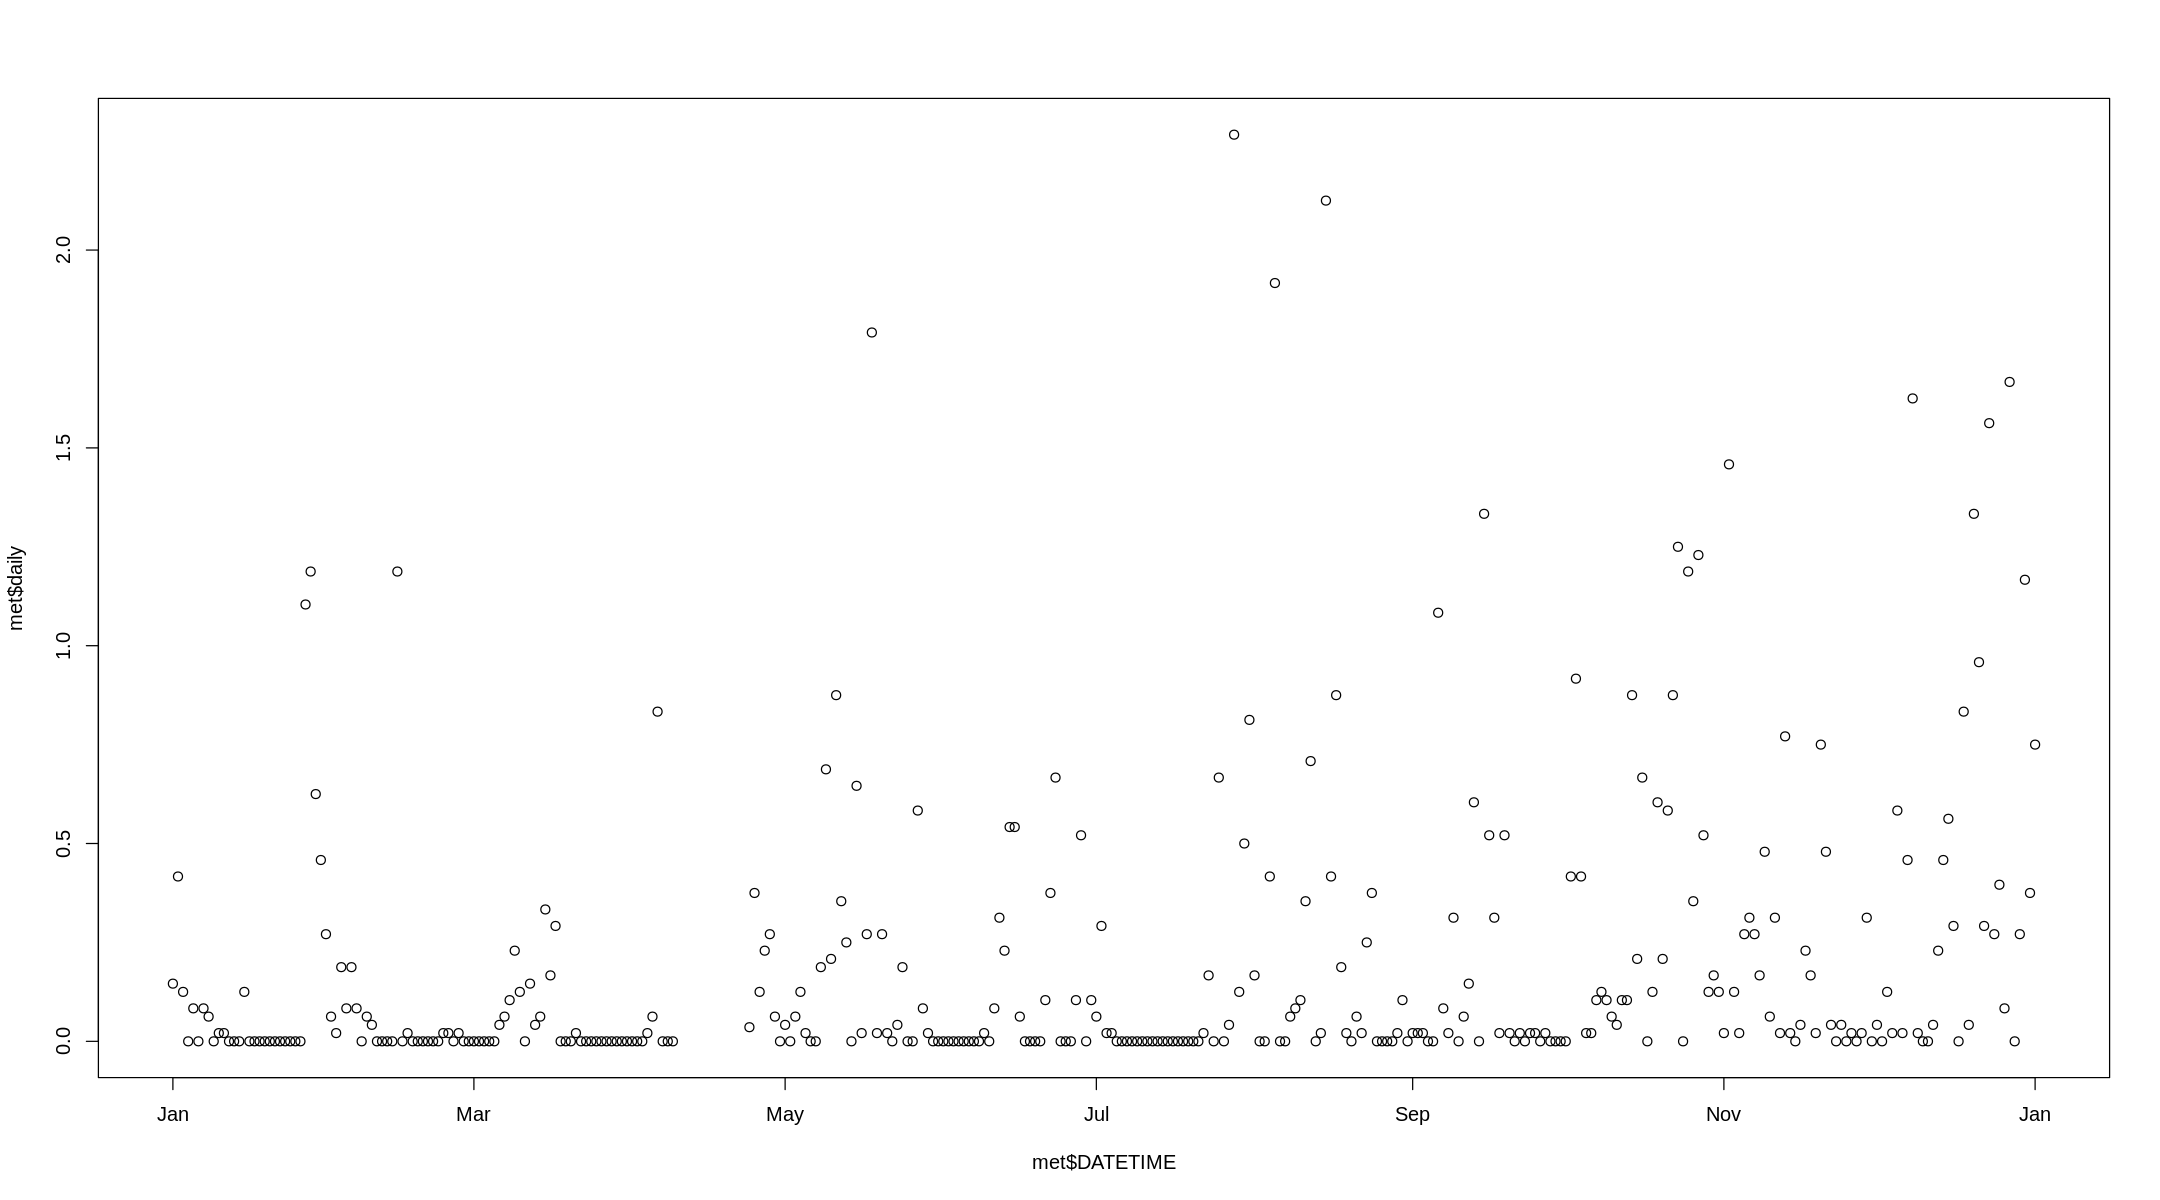

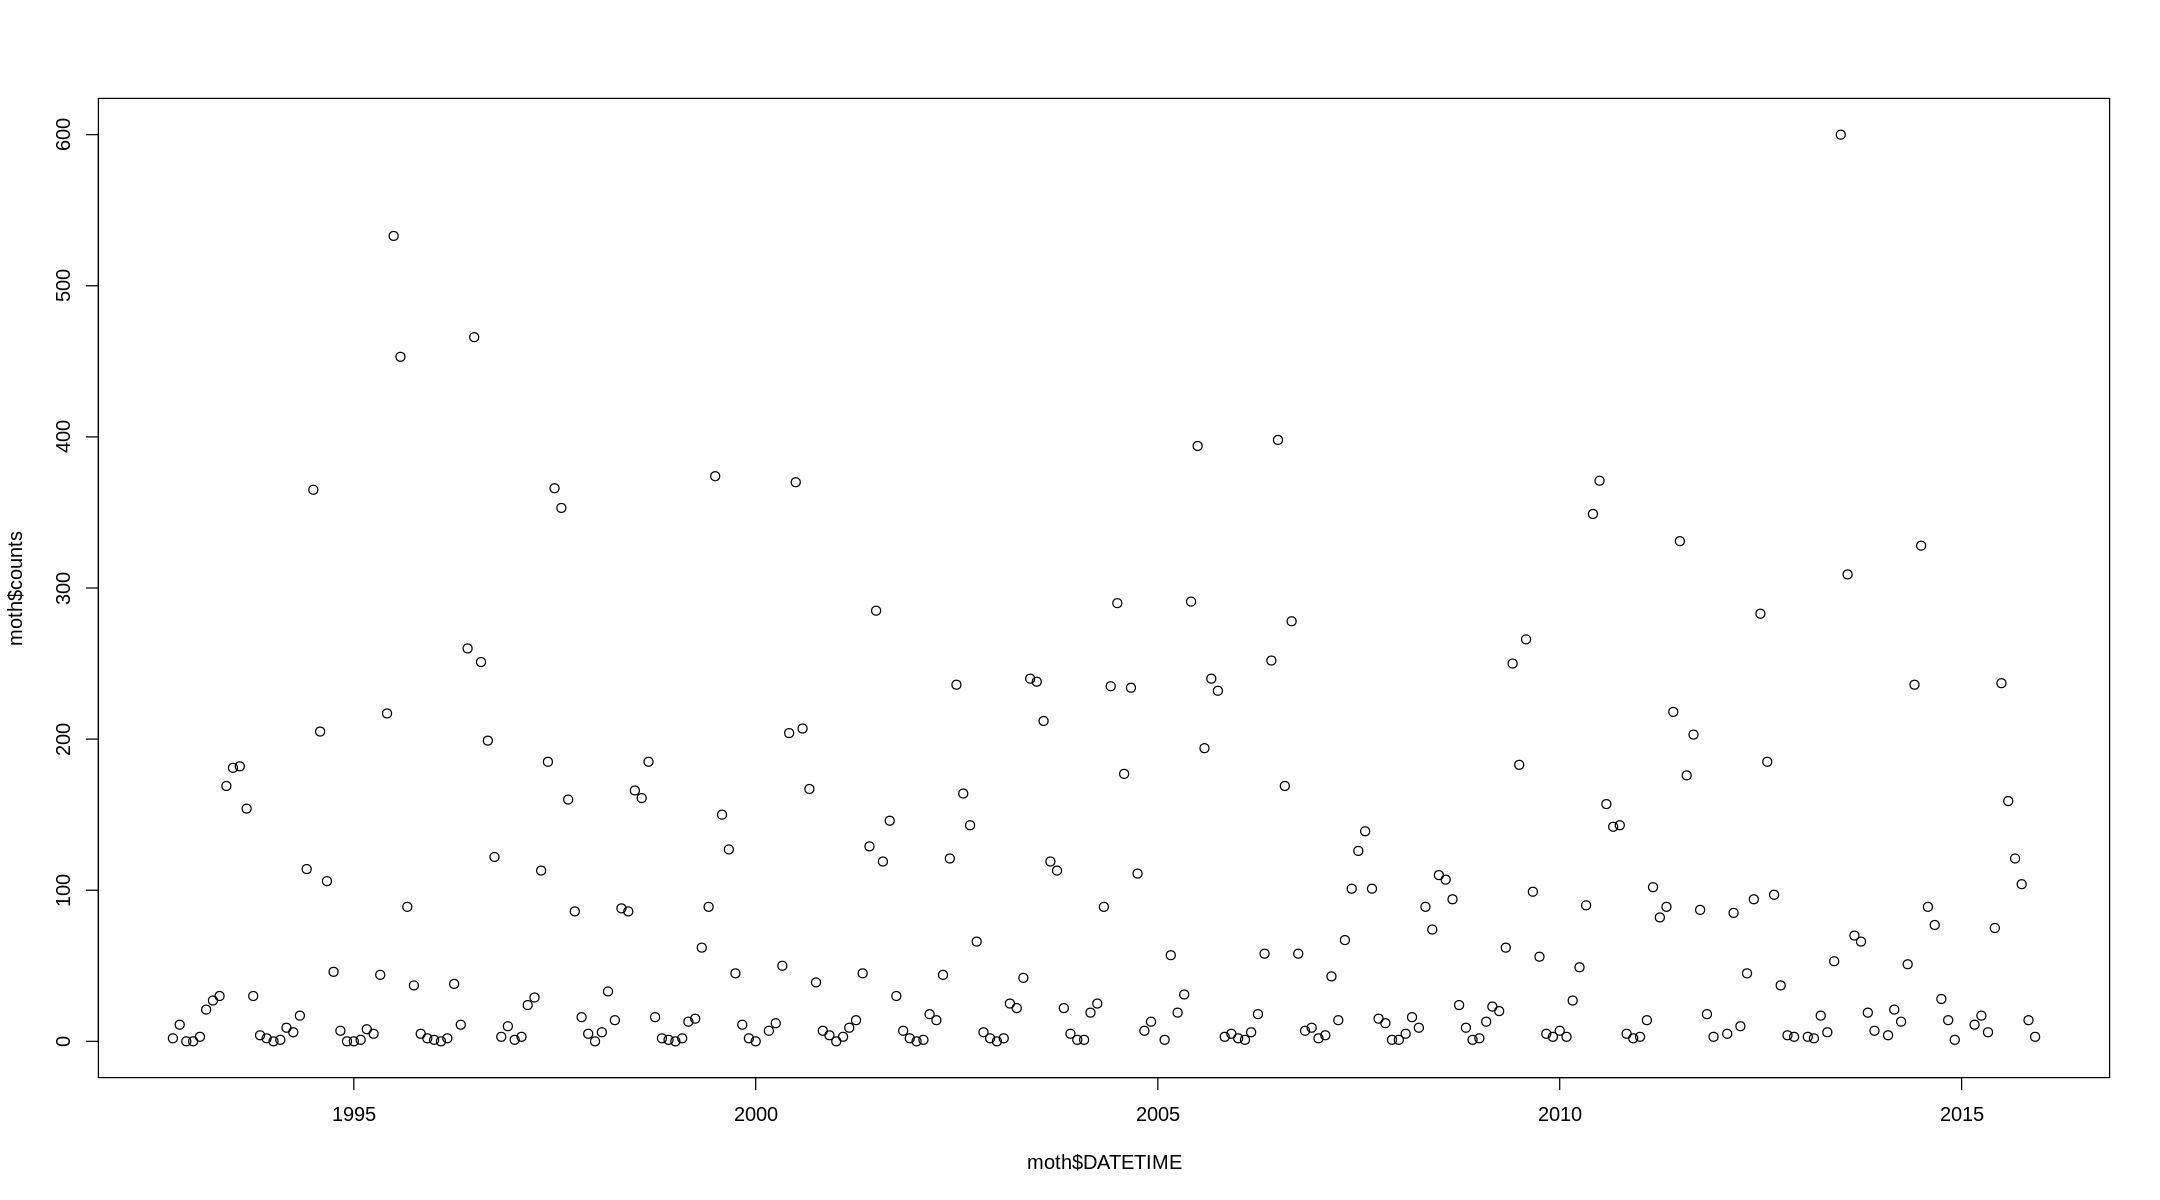

In [6]:
plot(met$DATETIME,met$daily)#
plot(moth$DATETIME, moth$counts )

In [ ]:
# plotting 
xmin <- min(c(moth$DATETIME, met$DATETIME)); #xmin <- as.Date("01-01-1990", format="%d-%m-%Y")
xmax <- max(c(moth$DATETIME, met$DATETIME)); #xmax <- as.Date("01-01-2000", format="%d-%m-%Y")

## create moth plot
plot_moth <- ggplot2::ggplot(moth, aes(x = DATETIME, y = counts) ) +
    geom_point() +
    geom_line() +
    xlim(xmin, xmax) ##+
    ##ylim(0, 10)

## create met plot
plot_met <- ggplot2::ggplot(met, aes(x = DATETIME, y = daily) ) +
    geom_point() +
    geom_line() +
    xlim(xmin,xmax) 


In [ ]:
#%%script flase
costname  <- c("normal_meanvar", "normal_meanvar")
penname <- c("bic", "bic")
##penname <- c("bic", 10*log(nrow(df_phos)))

cpts <- as.Date(
    cpt_MF(list(moth, met),costname, penname), # cpt_MF is the only bit of python calling the changeponint package
    format="%d-%m-%Y"
)
   
print("changepoints:")
print(cpts)

In [ ]:
cpt_moth <- plot_moth +
    geom_vline(xintercept=cpts, color='red')

cpt_met <- plot_met +
    geom_vline(xintercept=cpts, color='red')

gridExtra::grid.arrange(cpt_moth, cpt_met)

## Putting all together

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'year(DATETIME)' (override with `.groups` argument)



[1] "changepoints:"
 [1] "2013-12-11" "2013-12-09" "2013-10-13" "2013-10-11" "2013-10-06"
 [6] "2013-10-04" "2013-10-01" "2013-09-27" "2013-09-25" "2013-09-23"
[11] "2013-09-19" "2013-09-05" "2013-09-03" "2013-08-31" "2013-08-28"
[16] "2013-08-24" "2013-08-07" "2013-08-05" "2013-08-03" "2013-08-01"
[21] "2013-07-21" "2013-07-04" "2013-07-01" "2013-06-26" "2013-06-23"
[26] "2013-06-20" "2013-06-16" "2013-06-08" "2013-05-29" "2013-05-07"
[31] "2013-05-05" "2013-05-01" "2013-04-09" "2013-04-06" "2013-04-03"
[36] "2013-03-21" "2013-03-19" "2013-03-17" "2013-03-05" "2013-02-26"
[41] "2013-02-24" "2013-02-22" "2013-02-16" "2013-02-13" "2013-02-09"
[46] "2013-01-31" "2013-01-26" "2013-01-16" "2013-01-14" "2013-01-11"
[51] "2013-01-09" "2014-01-01"


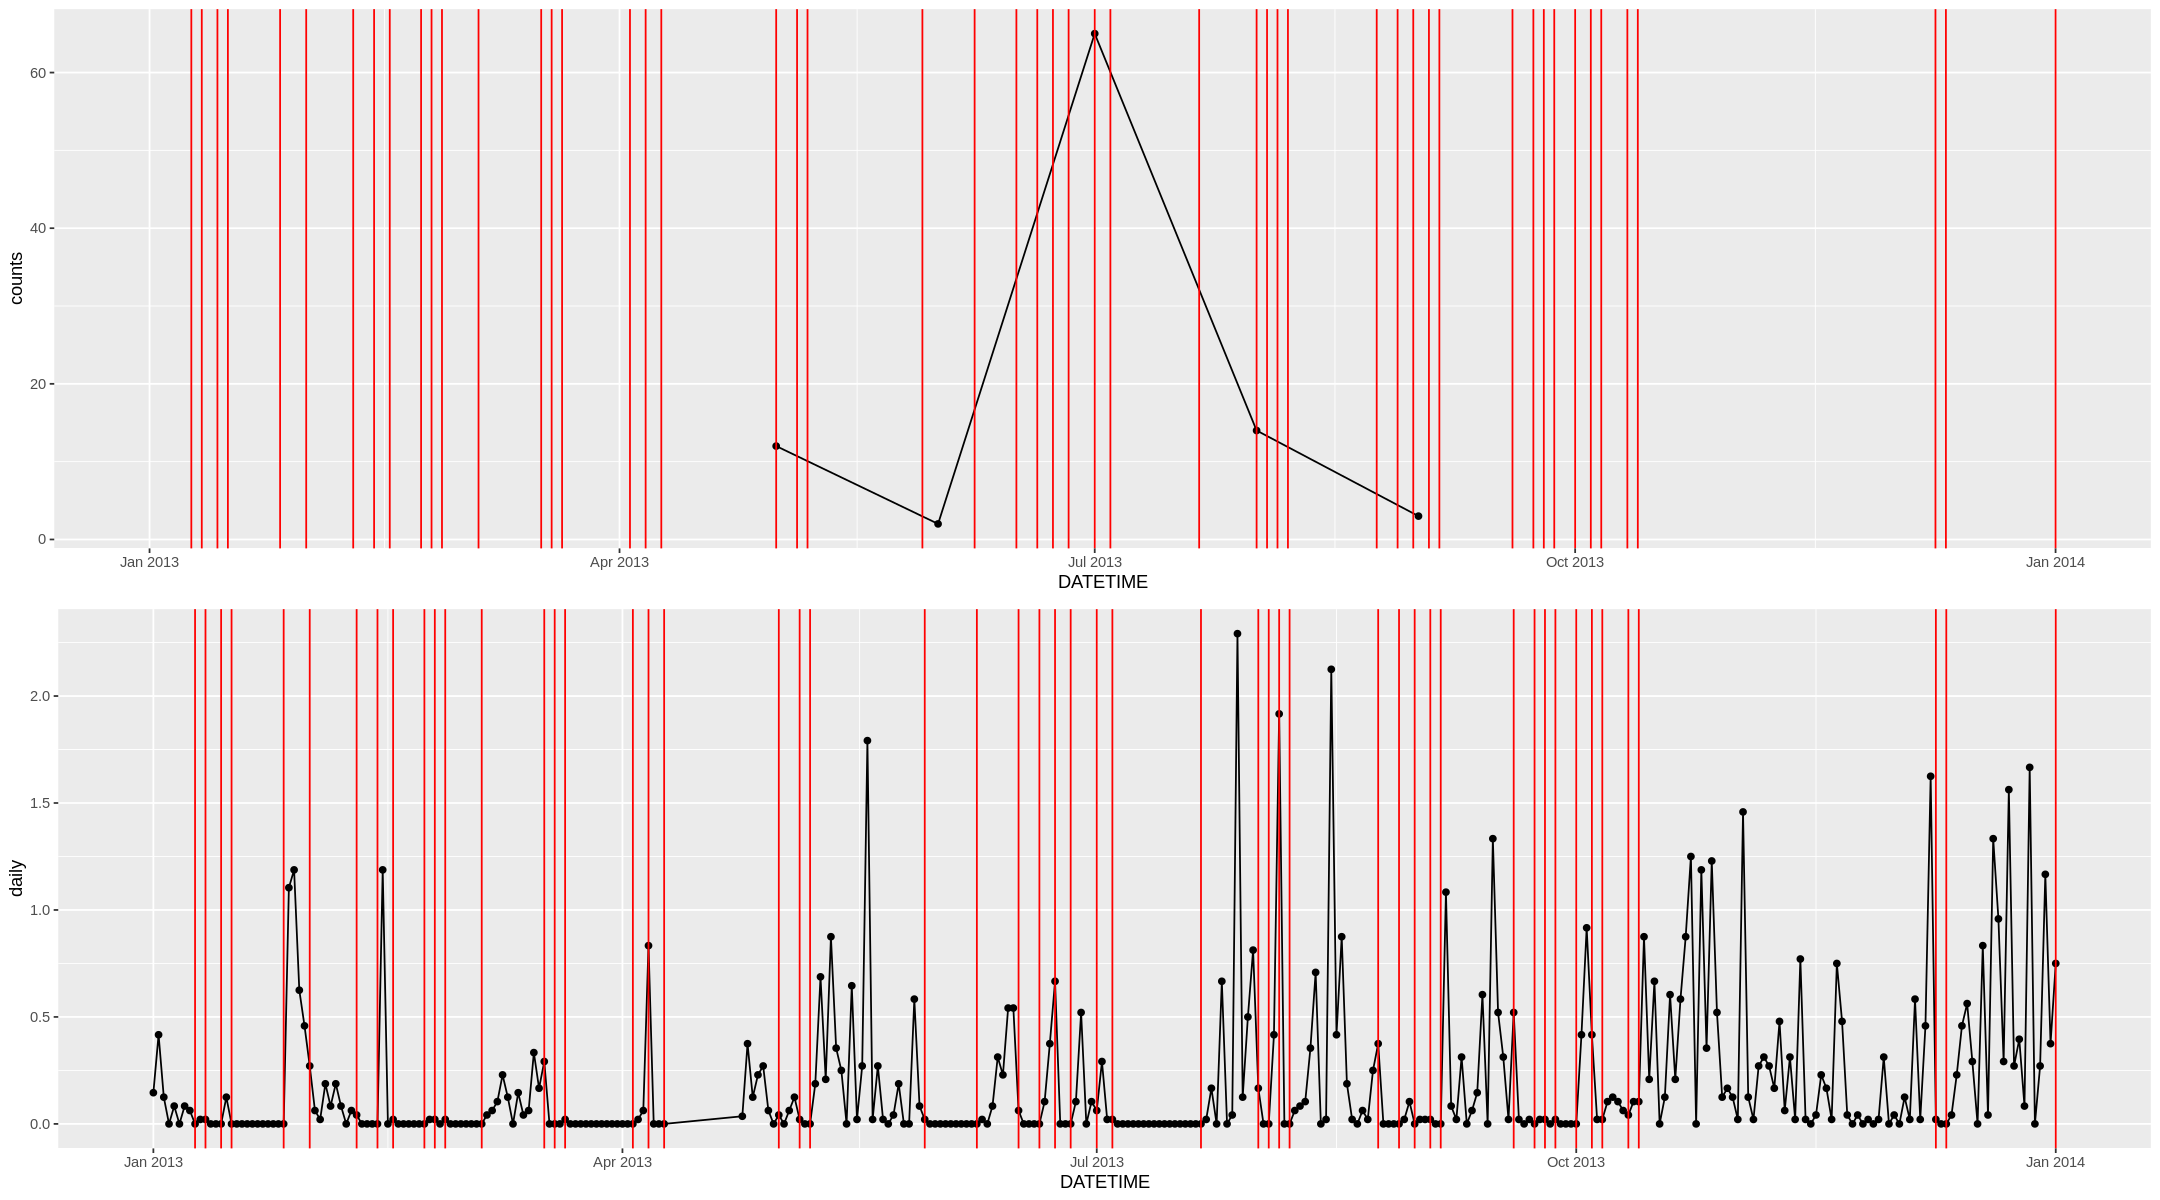

In [9]:

moth = inputData(list( dataset='moth',
                site = 'T04', 
                daterange= c("2013-01-01","2014-01-01"),
                avg_missing_data = TRUE,
                plotPredOpt = 'G'  # either groups (G,M,N,O) or species (`list_interesting_moth %>% distinct(DESC_COMMON)`)
                ))

met = inputDataMA %>% 
        dplyr::filter(SITECODE =='T04', FIELDNAME == 'RAIN') %>%
        dplyr::filter(as.Date(DATE) >= as.Date('2013-01-01') &
                    as.Date(DATE) <= as.Date('2014-01-01') ) %>%
        dplyr::filter() %>%
        dplyr::rename(DATETIME=DATE) %>%
        dplyr::select(DATETIME,daily)

costname  <- c("poisson_meanvar", "normal_meanvar")
penname <- c("bic", "bic")

cpts <- as.Date(
    CPT_MF(list(moth, met),costname, penname), # cpt_MF is the only bit of python calling the changeponint package
    format="%d-%m-%Y"
)
   
print("changepoints:")
print(cpts)
## ------------------------------------------------------------------------------------------- ##
# plotting 
xmin <- min(c(moth$DATETIME, met$DATETIME)); #xmin <- as.Date("01-01-1990", format="%d-%m-%Y")
xmax <- max(c(moth$DATETIME, met$DATETIME)); #xmax <- as.Date("01-01-2000", format="%d-%m-%Y")

## create moth plot
plot_moth <- ggplot2::ggplot(moth, aes(x = DATETIME, y = counts) ) +
    geom_point() +
    geom_line() +
    xlim(xmin, xmax) ##+
    ##ylim(0, 10)

## create met plot
plot_met <- ggplot2::ggplot(met, aes(x = DATETIME, y = daily) ) +
    geom_point() +
    geom_line() +
    xlim(xmin,xmax) 

cpt_moth <- plot_moth +
    geom_vline(xintercept=cpts, color='red')

cpt_met <- plot_met +
    geom_vline(xintercept=cpts, color='red')

gridExtra::grid.arrange(cpt_moth, cpt_met)